In [36]:
import pandas as pd
import numpy as np

# read in needed csv files
df = pd.read_csv('new_policy4.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


df.head()

,Unnamed: 0,0
0,0,1206
1,1,825
2,2,1111
3,3,42
4,4,183


In [2]:
def set_up_ratings(ratings, min_move=1000, min_use=50):
    ''' function for limiting the  movies that are being analyzed
    args:
        ratings: dataframe of all ratings
        min_move(int): the minimum number of reviews a movie must have to be considered
        min_use(int): the minimum number of reviews a user must have for their reviews to be considered
    returns:
        ratings: updated ratings dataframe
        movie_dict: mapping of movie ids from their original id to new ids
        '''

    # groupby dataframes to get number of reviews
    by_movie = ratings.groupby('movieId').count()
    by_user = ratings.groupby('userId').count()

    # limit to movies with enough reviews
    by_movie = by_movie.reset_index()[['movieId', 'rating']]
    by_movie = by_movie[by_movie['rating']>=min_move]

    # limit to users with enough reviews
    by_user = by_user.reset_index()[['userId', 'rating']]
    by_user = by_user[by_user['rating']>=min_use]

    # get list of movies to be considered and get id mapping
    all_movies = by_movie['movieId']
    movie_dict = dict(zip(all_movies, range(len(all_movies))))

    # limit ratings dataframe properly and set new movie ids based on mappin
    ratings = ratings[ratings['movieId'].isin(by_movie['movieId'])]
    ratings = ratings[ratings['userId'].isin(by_user['userId'])]
    ratings['movieId'] = ratings['movieId'].map(movie_dict)

    return ratings, movie_dict, by_movie

# create easy to read dataframe of movie recomendations
ratings, movie_dict, by_movie = set_up_ratings(ratings)
reverse_movie_dict = {v: k for k, v in movie_dict.items()}
original_movies = [reverse_movie_dict[item] for item in range(len(df))]
original_recs = [reverse_movie_dict[item] for item in df['0']]
data = {'movieID': original_movies, 'recomendation': original_recs}
rec_df = pd.DataFrame(data)
rec_df['movie name'] = rec_df.apply(lambda row: movies[movies['movieId']==row['movieID']]['title'].values[0], axis =1)
rec_df['recomendation name'] = rec_df.apply(lambda row: movies[movies['movieId']==row['recomendation']]['title'].values[0], axis =1)

# add columns for number of reviews and average reviews
rec_df['num_reviews'] = rec_df.apply(lambda row: by_movie[by_movie['movieId']== row['movieID']]['userId'].values[0], axis = 1)
rec_df['avg_review'] = rec_df.apply(lambda row: by_movie[by_movie['movieId']== row['movieID']]['rating'].values[0], axis = 1)

# print out recomendations for most reviewed movies
rec_df.sort_values('num_reviews', ascending= False).head(50)

,movieID,recomendation,movie name,recomendation name,num_reviews,avg_review
193,356,3147,Forrest Gump (1994),"Green Mile, The (1999)",81491,4.048011
173,318,3147,"Shawshank Redemption, The (1994)","Green Mile, The (1999)",81482,4.413576
161,296,1089,Pulp Fiction (1994),Reservoir Dogs (1992),79672,4.188912
302,593,1193,"Silence of the Lambs, The (1991)",One Flew Over the Cuckoo's Nest (1975),74127,4.151342
1039,2571,79132,"Matrix, The (1999)",Inception (2010),72674,4.154099
143,260,1196,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back...,68717,4.120189
248,480,589,Jurassic Park (1993),Terminator 2: Judgment Day (1991),64144,3.679175
271,527,5995,Schindler's List (1993),"Pianist, The (2002)",60411,4.247579
70,110,3578,Braveheart (1995),Gladiator (2000),59184,4.002273
1151,2959,296,Fight Club (1999),Pulp Fiction (1994),58773,4.228311


In [12]:
from pyvis.network import Network

# creating graph network of all recomendations

# Create the network
net = Network(height="750px", width="100%", bgcolor='#222222', font_color='white')
net.barnes_hut()

# Add nodes
for _, row in rec_df.iterrows():
    net.add_node(str(row['movie name']), label=str(row['movie name']))
#, size=int(row['num_reviews'])
# Add edges
for _, row in rec_df.iterrows():
    if row['recomendation name'] not in net.nodes:
        net.add_node(str(row['recomendation name']), label=str(row['recomendation name']))
    net.add_edge(str(row['movie name']), str(row['recomendation name']))


# net.write_html('movie_connections_3.html')

In [10]:
# find movies with most recomendations
most_recs = rec_df.groupby('recomendation name').count()
most_recs.sort_values('num_reviews', ascending=False).head(20)

,movieID,recomendation,movie name,num_reviews,avg_review
recomendation name,,,,,
"Shawshank Redemption, The (1994)",17,17,17,17,17
Mary Poppins (1964),16,16,16,16,16
"Godfather, The (1972)",13,13,13,13,13
My Fair Lady (1964),13,13,13,13,13
Happy Gilmore (1996),12,12,12,12,12
Sense and Sensibility (1995),11,11,11,11,11
This Is Spinal Tap (1984),10,10,10,10,10
"Boot, Das (Boat, The) (1981)",10,10,10,10,10
Young Frankenstein (1974),9,9,9,9,9


Text(0.5, 1.0, 'Average Reward per Time Step over Episodes')

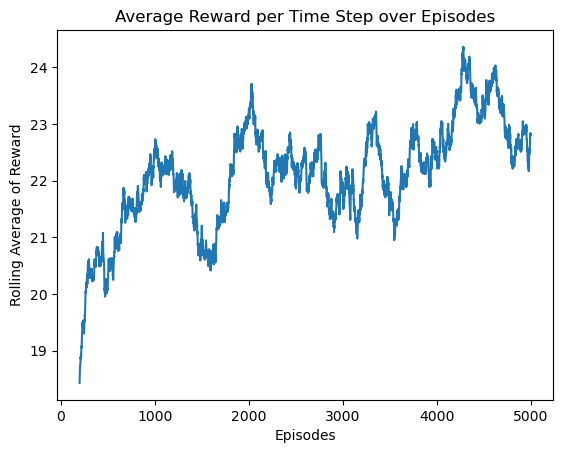

In [16]:
# plot average reward per timestep over episode  (smoothed)
import matplotlib.pyplot as plt
rewards = pd.read_csv('rewards4.csv')

rolling_avg = rewards['0'].rolling(window=200).mean()  
plt.plot(rolling_avg)
plt.xlabel('Episodes')
plt.ylabel('Rolling Average of Reward')
plt.title('Average Reward per Time Step over Episodes')

Text(0.5, 1.0, 'Number of Timesteps per Epsisode over Episodes')

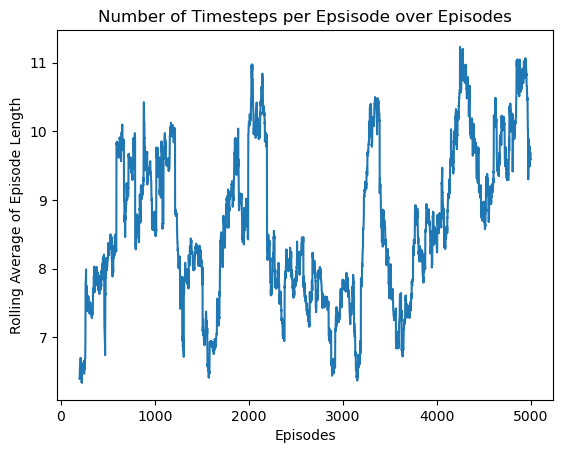

In [17]:
# plot average reward per timestep over episode  (smoothed)
import matplotlib.pyplot as plt
rewards = pd.read_csv('steps4.csv')

rolling_avg = rewards['0'].rolling(window=200).mean()  
plt.plot(rolling_avg)
plt.xlabel('Episodes')
plt.ylabel('Rolling Average of Episode Length')
plt.title('Number of Timesteps per Epsisode over Episodes')

In [15]:
most_recs.shape

(1159, 5)